## Import The Libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# For Scalling
from sklearn.preprocessing import StandardScaler

## For K-Means 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

## For Agloromative 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet

## For DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
np.set_printoptions(suppress=True)

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

*PROBLEM STATEMENT*

*Objective:* To categorise the countries using socio-economic and health factors that determine the overall development of the country.
About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.


*Problem Statement:* HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the mos

## Load The Dataset

In [5]:
data = pd.read_csv('Country-data.csv')
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [6]:
## SSince each row represent the country lets use country name as index
data.set_index('country',inplace=True)

In [7]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Exploration

In [9]:
print('No of countries:',data.shape[0])

No of countries: 167


In [10]:
# 5 point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


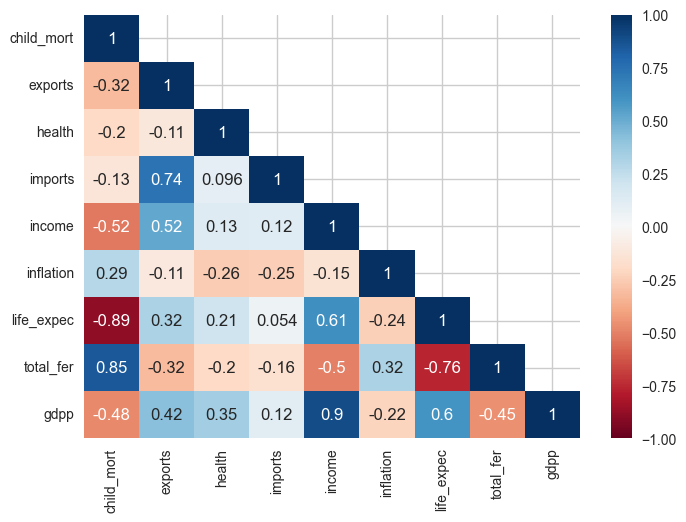

In [11]:
# Lets look at the correlation plot
sns.heatmap(data.corr(),annot=True,vmin=-1,cmap='RdBu',mask=np.triu(data.corr(),k=1))
plt.show()

In [12]:
# Univariate Analysis

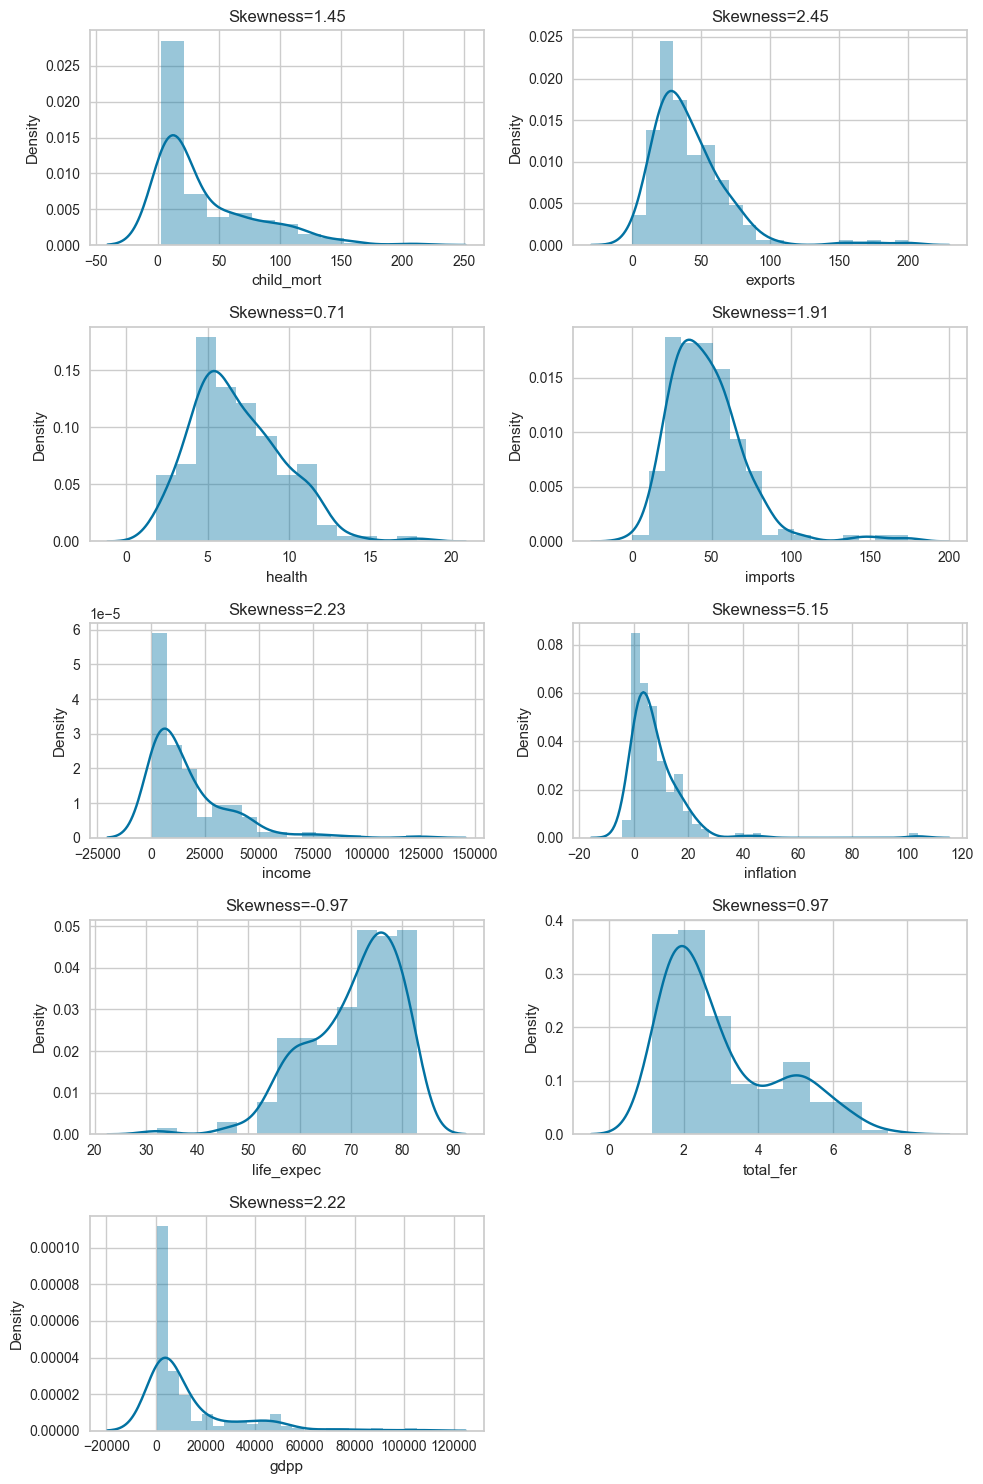

In [13]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    plt.title(f'Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

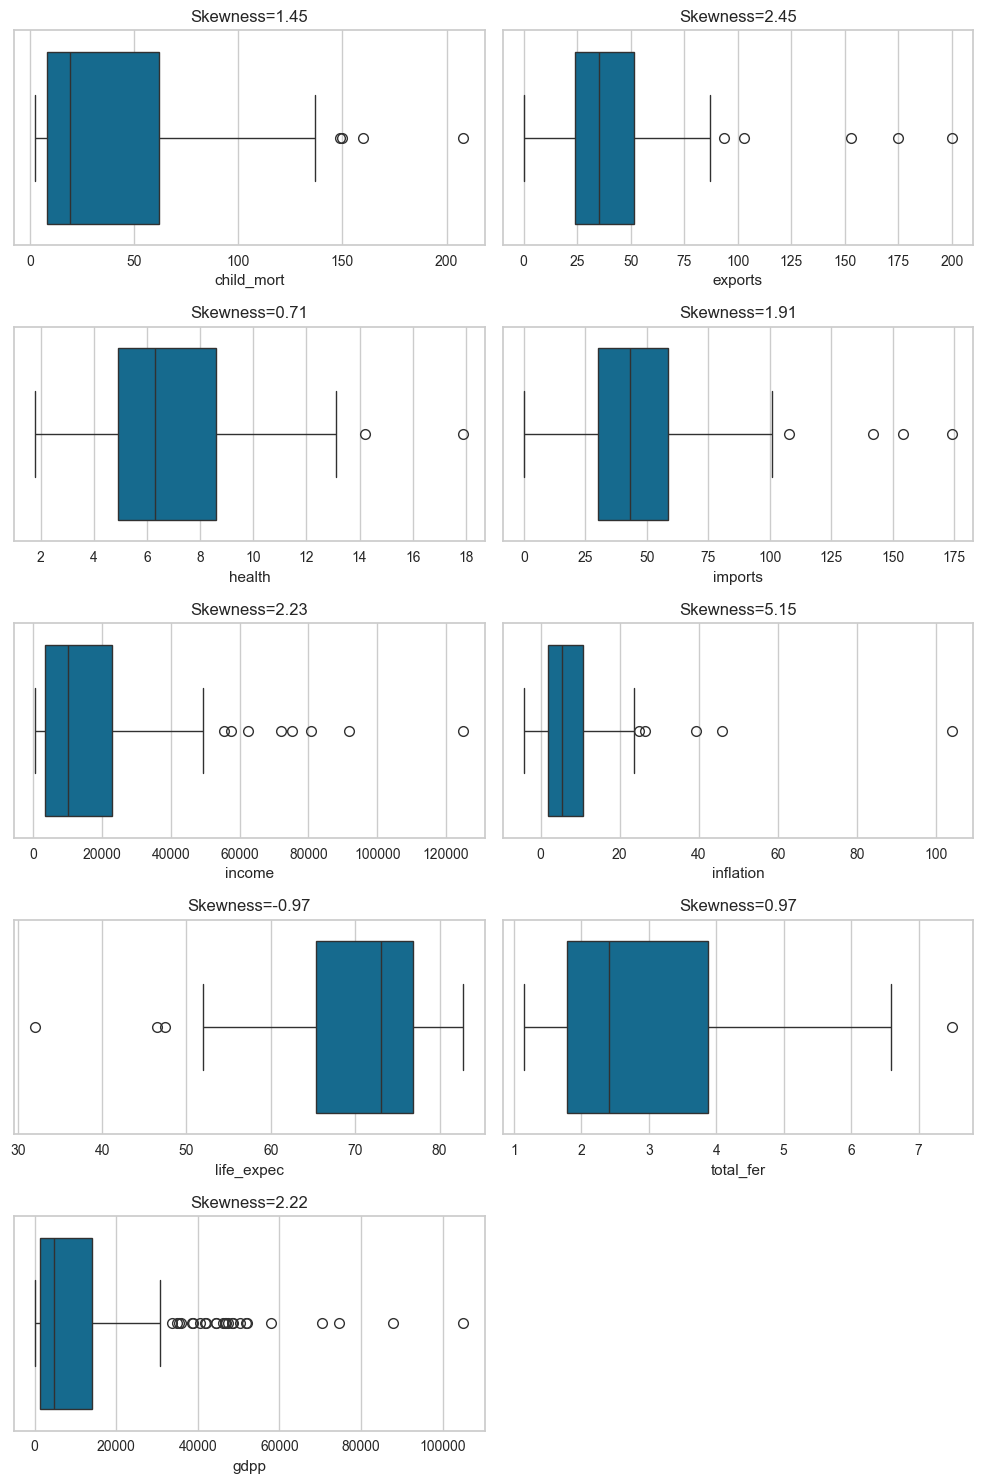

In [14]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

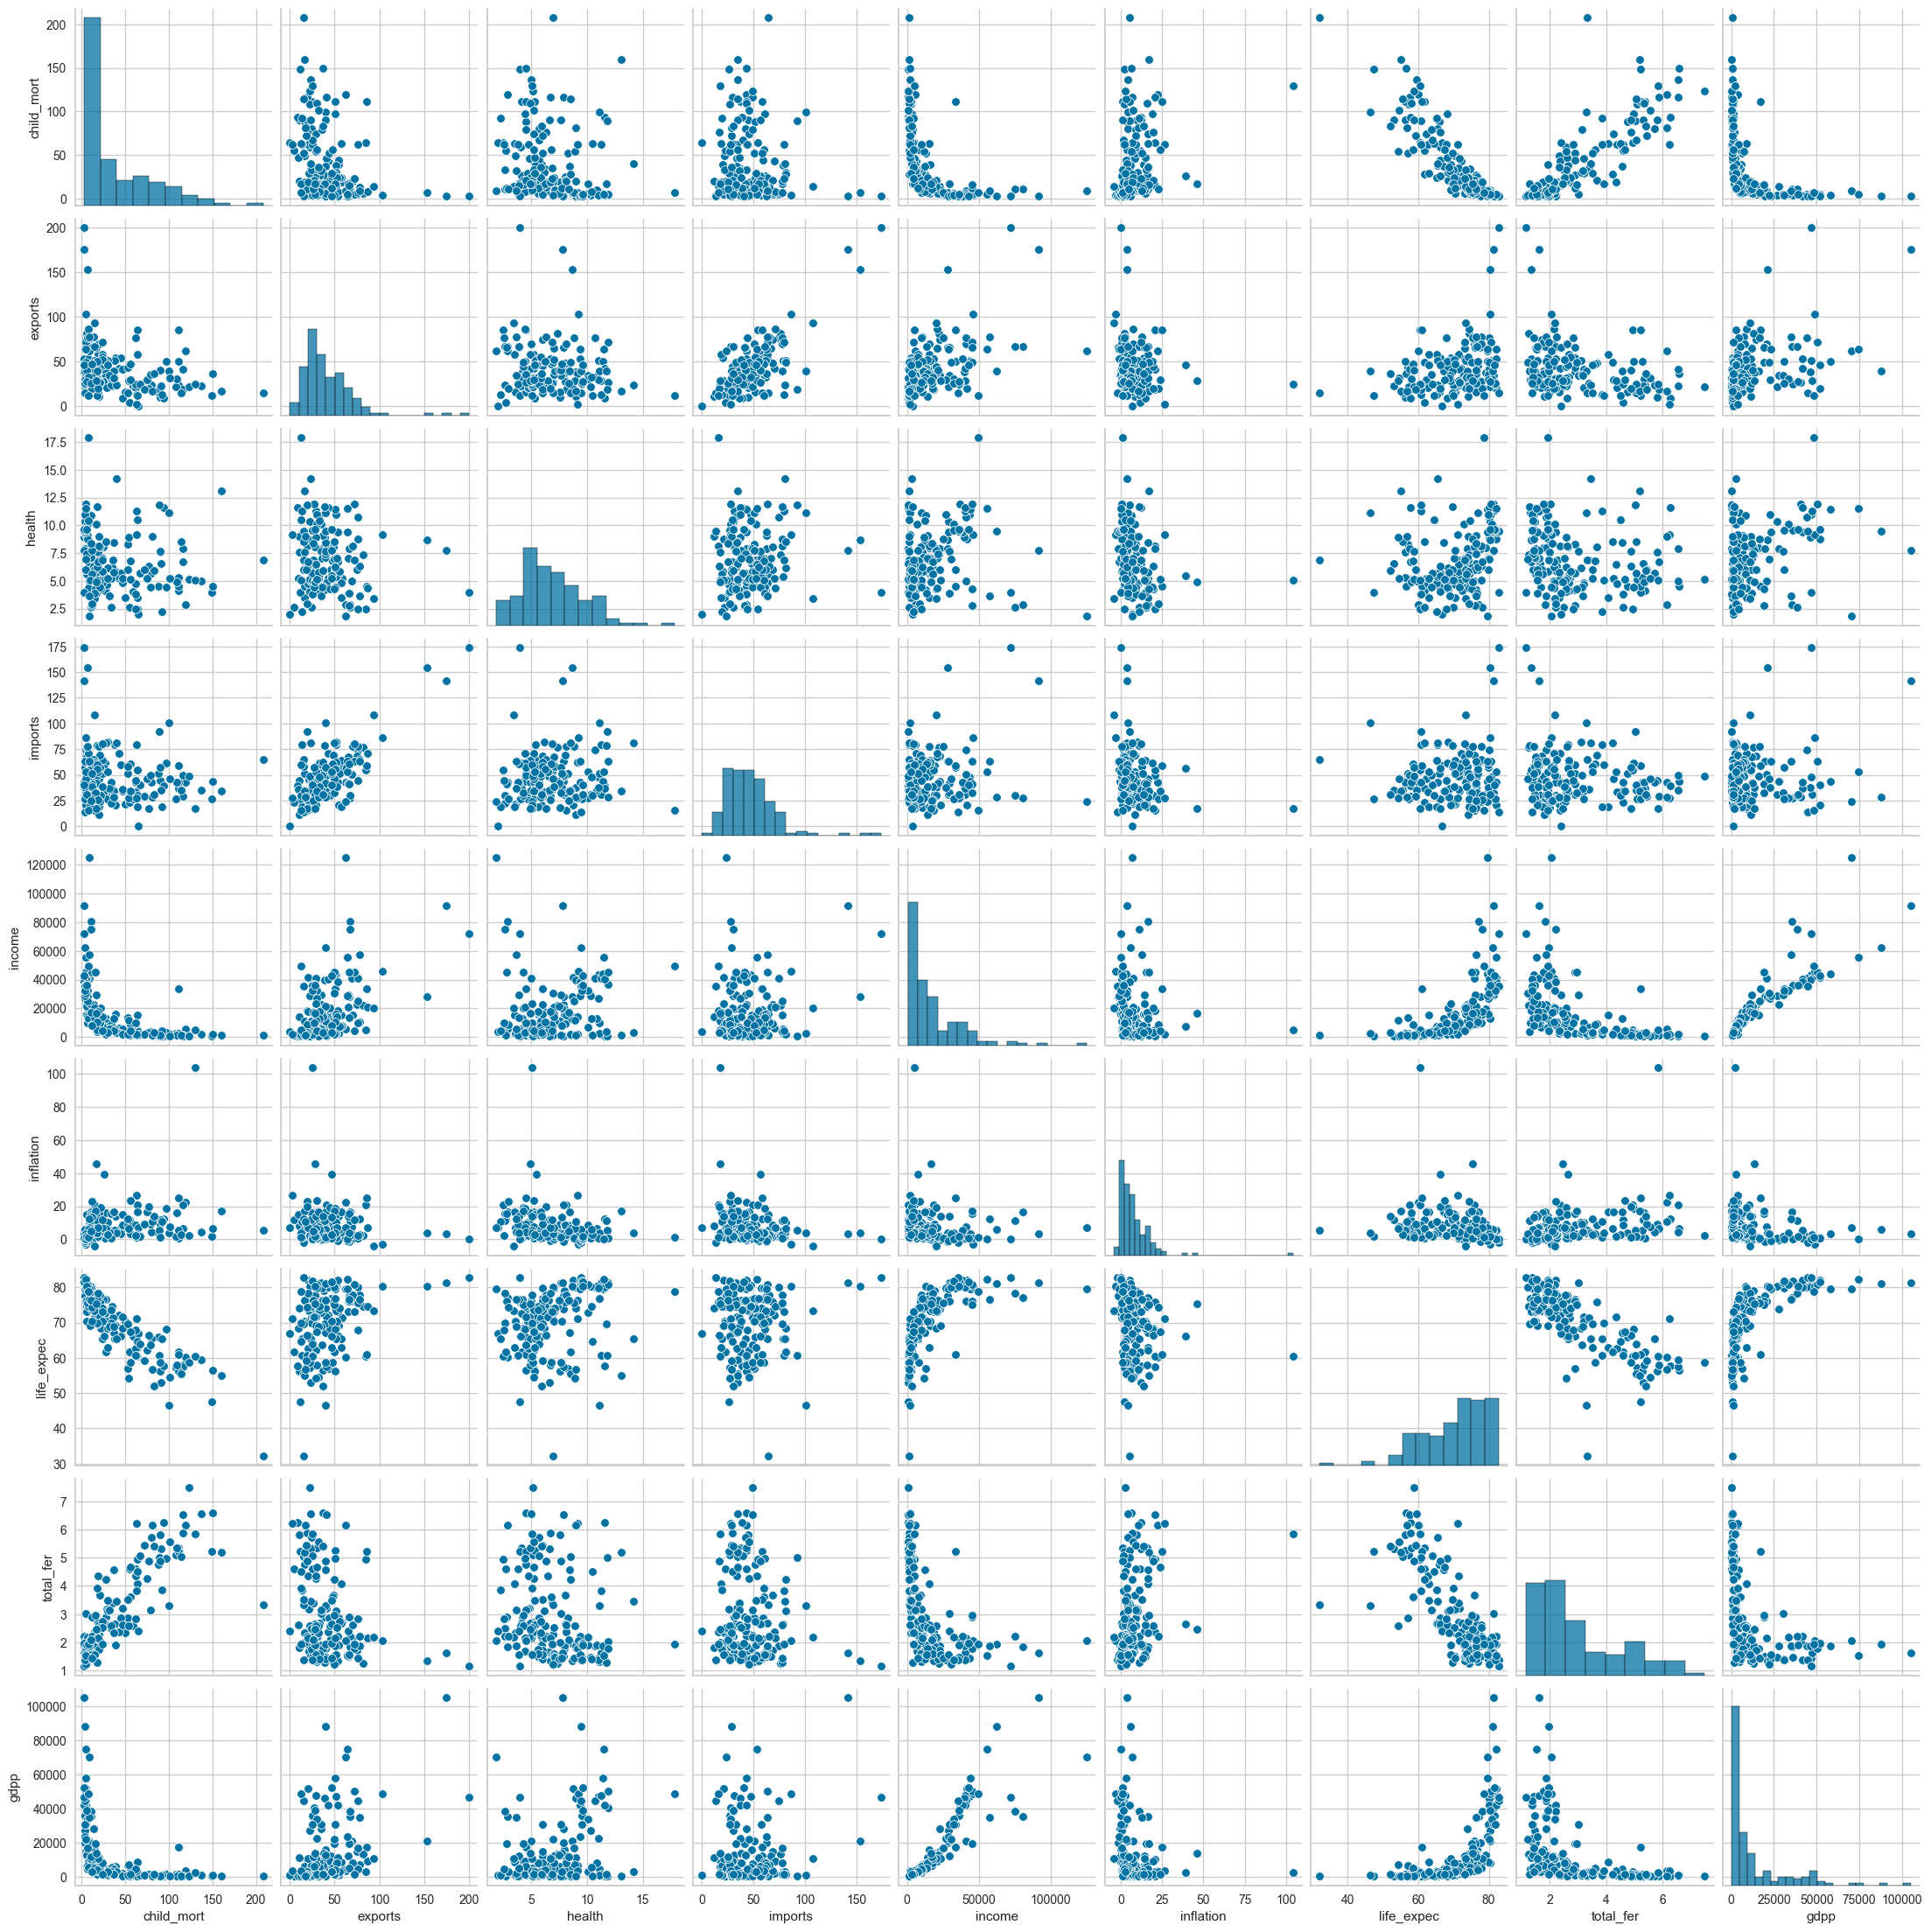

In [15]:
sns.pairplot(data)

In [16]:
# Clean The Data

# Check for missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [17]:
# check for duplicatted rows
data.duplicated().sum()

0

**There are no missing value and duplicated rows in the data.**

In [19]:
# Treat the outlier ( capping using iqr method)

for i in data.columns:
    q3,q1 = np.percentile(data[i],[75,25])
    iqr = q3-q1
    ul,ll = q3+1.5*iqr,q1-1.5*iqr
    data[i] = data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

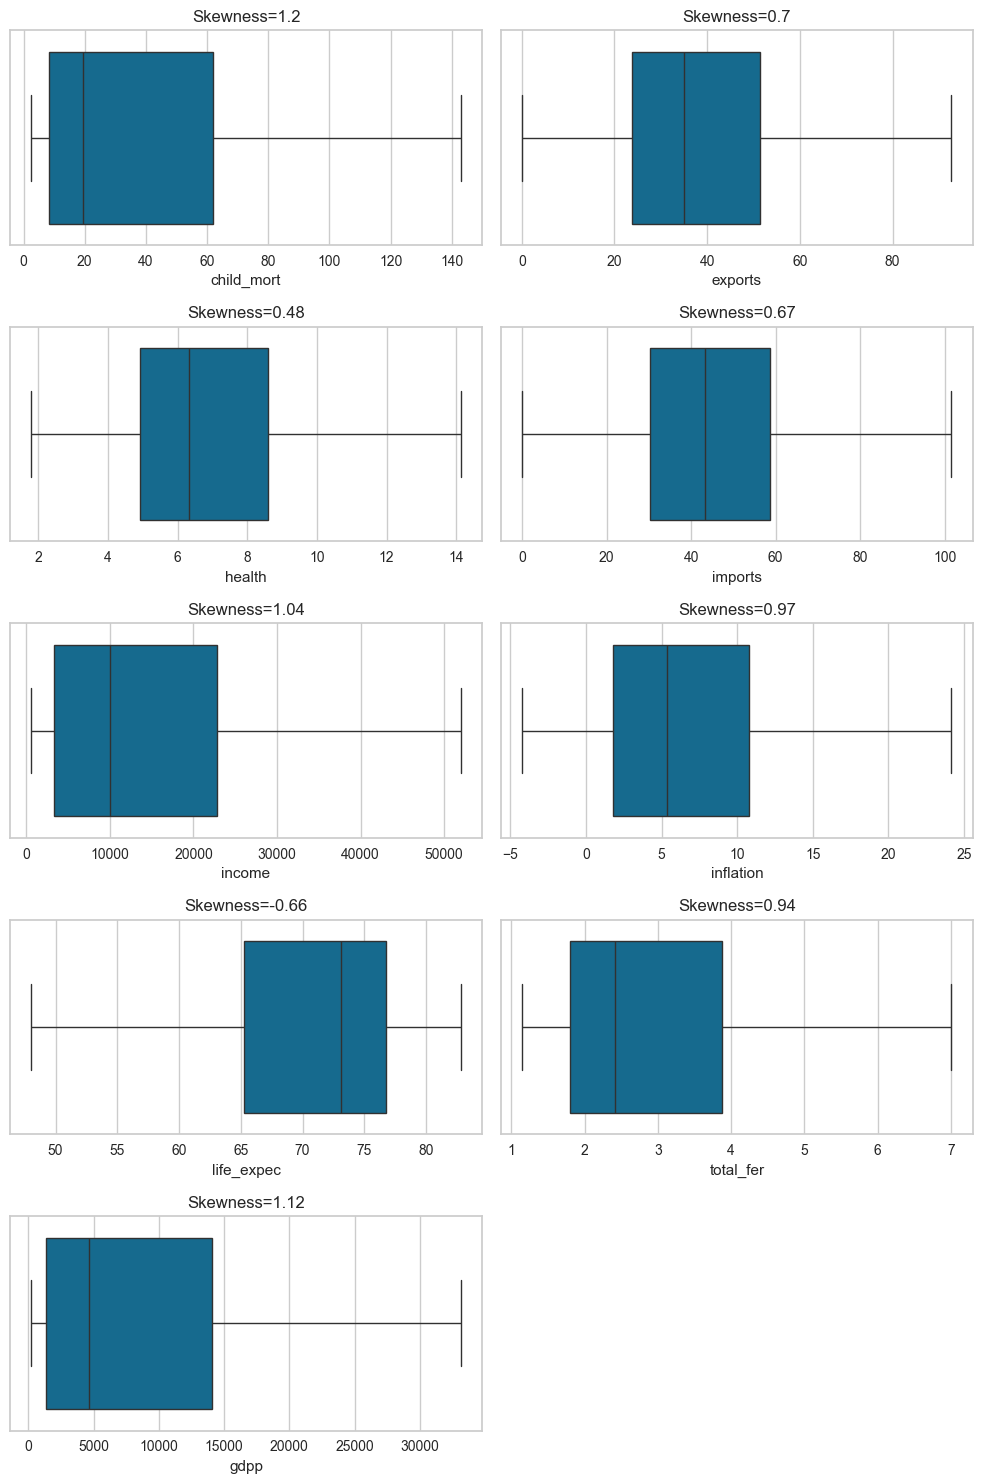

In [20]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f'Skewness={round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

We will scaled the data for clustering

In [22]:
sc = StandardScaler()

In [23]:
data_s = sc.fit_transform(data)
data_s = pd.DataFrame(data_s,columns=data.columns,index=data.index)
data_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686


## PCA (Principal Component Analysis)

**For better cluster and better visualization**

In [25]:
pca = PCA(n_components=9)

In [26]:
pca.fit(data_s)

PCA(n_components=9)

In [27]:
# Lets use percentage of explained variance to decide no. of PC's (95% variance)
pca.explained_variance_ratio_.cumsum()

array([0.48892383, 0.65345231, 0.79102018, 0.88606572, 0.95106892,
       0.97118734, 0.98774592, 0.99674059, 1.        ])

In [28]:
pca_final = PCA(n_components=5)
pca_data = pca_final.fit_transform(data_s)

In [29]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data_s.index)

In [30]:
pca_data

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
Albania,0.434979,-0.218700,-0.292591,-1.391241,0.156711
Algeria,-0.416784,-0.613870,1.637859,-0.615021,0.536604
Angola,-3.306409,1.066649,2.151219,1.698677,0.160551
Antigua and Barbuda,1.253246,0.547778,-0.136955,-0.716890,-0.394628
...,...,...,...,...,...
Vanuatu,-0.882087,0.945856,-0.227550,-0.680105,-0.551247
Venezuela,-0.240053,-1.742315,2.238331,-0.080500,1.318475
Vietnam,0.305579,2.152785,0.455745,-0.746171,1.383759


## Clustering

### K-Means Clustering

In [32]:
# Let's identify the value of k 

# Elbow Plot
kelbow = KElbowVisualizer(KMeans(),k=10)

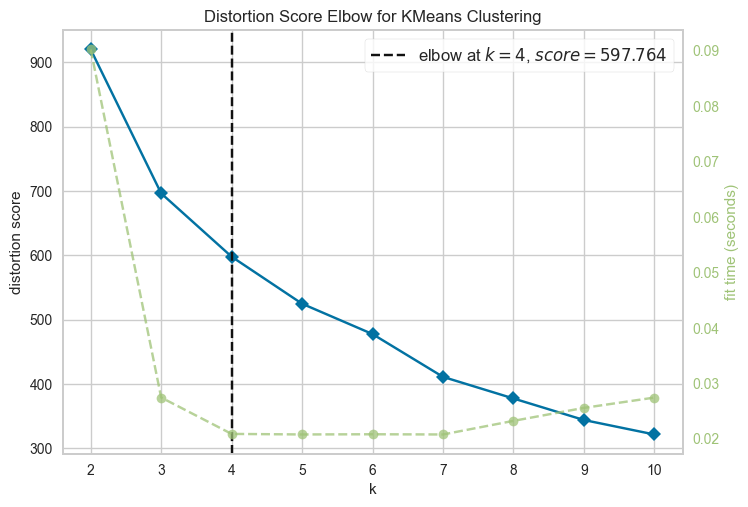

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
kelbow.fit(pca_data)
kelbow.show()

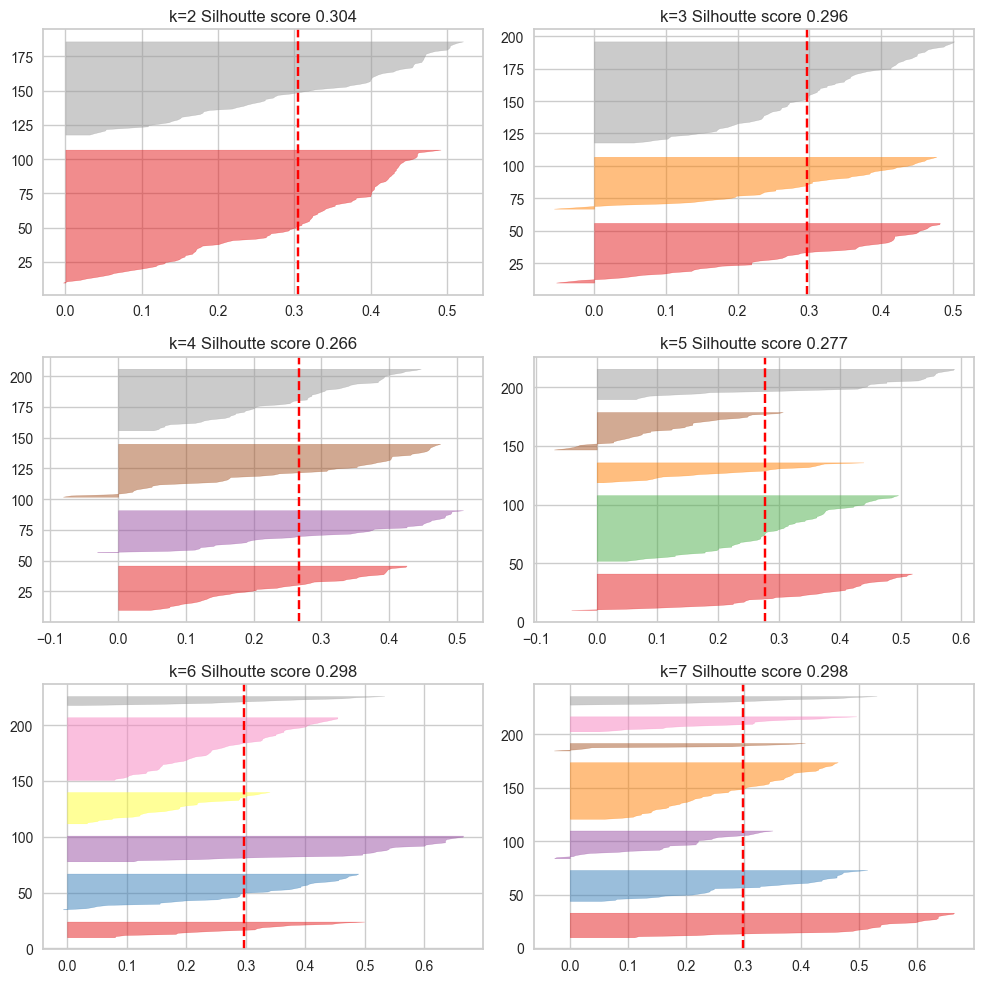

In [34]:
# Silhouette Visualizer
t=1
plt.figure(figsize=(10,10))
for i in range(2,8):
    plt.subplot(3,2,t)
    model = KMeans(n_clusters=i)
    sil_vis=SilhouetteVisualizer(model)
    sil_vis.fit(pca_data)
    plt.title(f'k={i} Silhoutte score {round(sil_vis.silhouette_score_,3)}')
    t+=1
plt.tight_layout()
plt.show()

**We can go with k=3**

Reason:
* Although there is no oulier in k=2 but some significant clusters can be created with k=3
* With k=3 we will make one more cluster in between which will be a subcluster of 2 clusters.

In [36]:
kmean = KMeans(n_clusters=3,random_state=1)
kmean_label = kmean.fit_predict(pca_data)

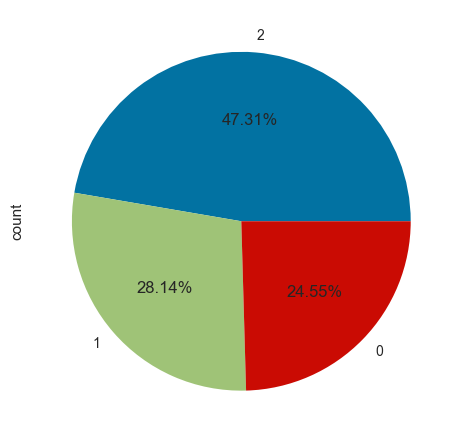

In [37]:
pd.Series(kmean_label).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

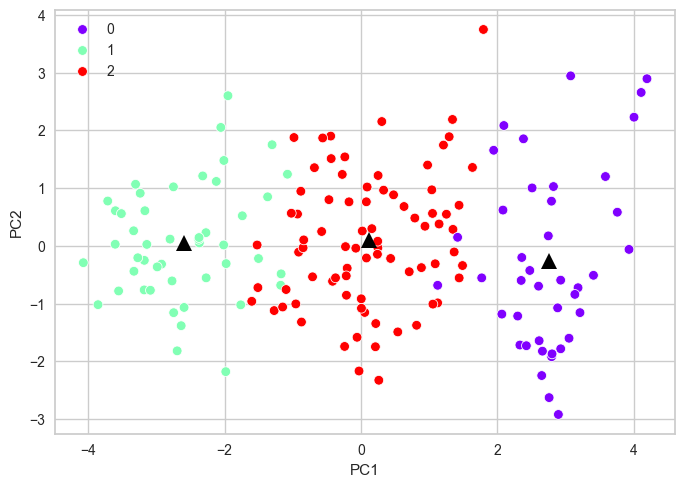

In [38]:
## Visualize The Clusters
centroid = kmean.cluster_centers_
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=kmean_label,palette='rainbow')
for i in range(3):
    plt.plot(centroid[i][0],centroid[i][1],marker='^',color='black',ms=12)
plt.show()

## Aggloromative Clustering

In [40]:
# Lets make dist_mat and link_mat

dist_mat = euclidean_distances(pca_data)
link_mat = linkage(pca_data,method='ward')

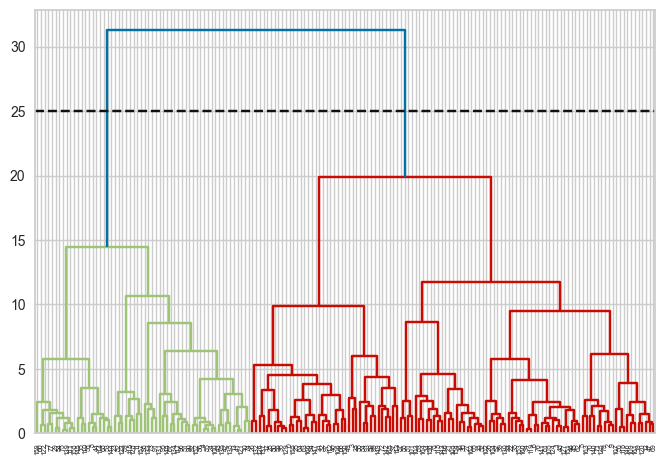

In [41]:
dendrogram(link_mat)
plt.axhline(y=25,ls='--',color='k')
plt.show()

**We can go with wards linkage method with k=2**

In [43]:
agglo = AgglomerativeClustering(n_clusters=2)

In [44]:
agglo_labels = agglo.fit_predict(pca_data)
print(f'Silhouette Score: ',round(silhouette_score(pca_data,agglo_labels),3))

Silhouette Score:  0.303


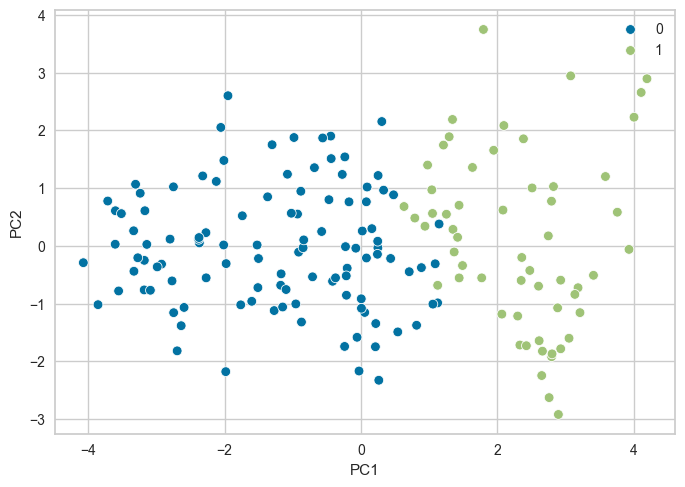

In [45]:
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=agglo_labels)
plt.show()

## Final Model & Business Intepretation

**Both the Algorithms gives the same Silhouette Score -0.3.K-mean cluster gives k=3 and aggloromative gives k=2. We need to decide which 
clustering model we should go with. Let's go with k-means as aggloromative is better for hierarchical data, while data has no such
hierarchy.**

In [47]:
data['label'] = kmean_label

**Business Intepretation**

In [49]:
data.groupby(by='label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,5.651220,52.719512,8.331951,47.598171,38988.780488,3.235171,79.514634,1.799756,28969.512195
1,91.182979,28.225936,6.253830,41.233317,3738.574468,10.215426,59.777660,4.987819,1808.297872
2,22.510127,39.438671,6.314177,47.714873,11198.101266,7.178468,72.546835,2.324177,5771.189873


In [50]:
data['label'] = data['label'].map({0: 'Developed',
                                   1: 'Under Developed',
                                  2: 'Developing'})

**Inference**

* 0- has lowest child_mort than 2 and 1 has highest child_mort.
* % of GDP in exports is highest for 0 and lowest for 1, While 2 has average exports.
* Health index for 0 is clearly better than 1 and 2 both.
* ----------
* ----------

In [52]:
# Lets visualize these classes

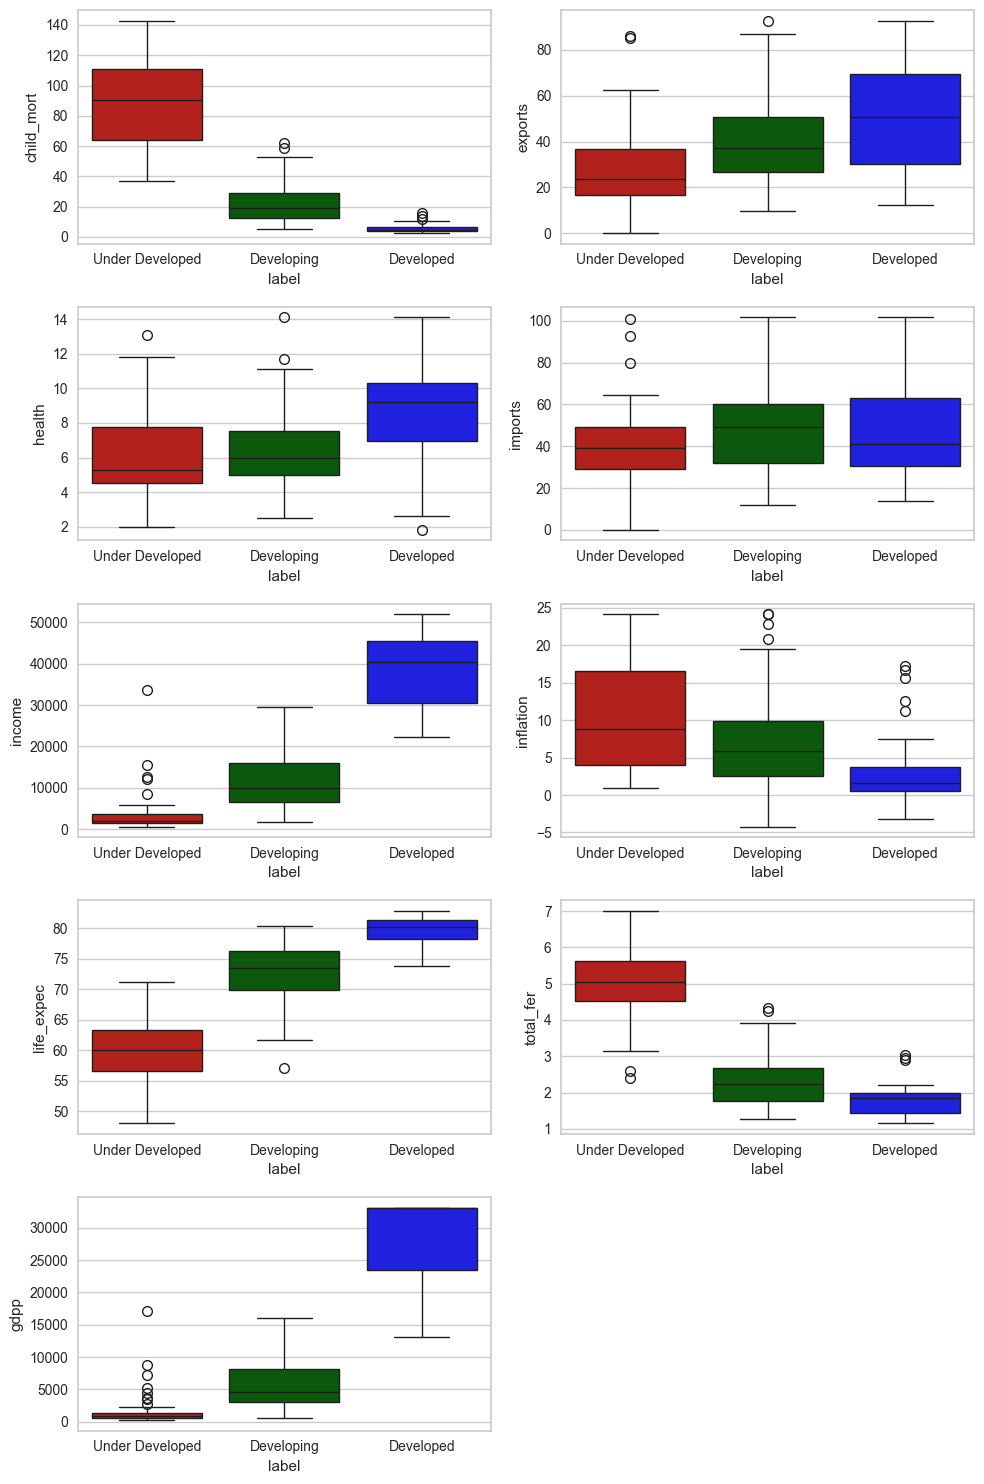

In [53]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    if i!= 'label':
        plt.subplot(5,2,t)
        sns.boxplot(data,y=i,x='label',hue='label',palette=['r','darkgreen','blue'])
        t+=1
plt.tight_layout()
plt.show()

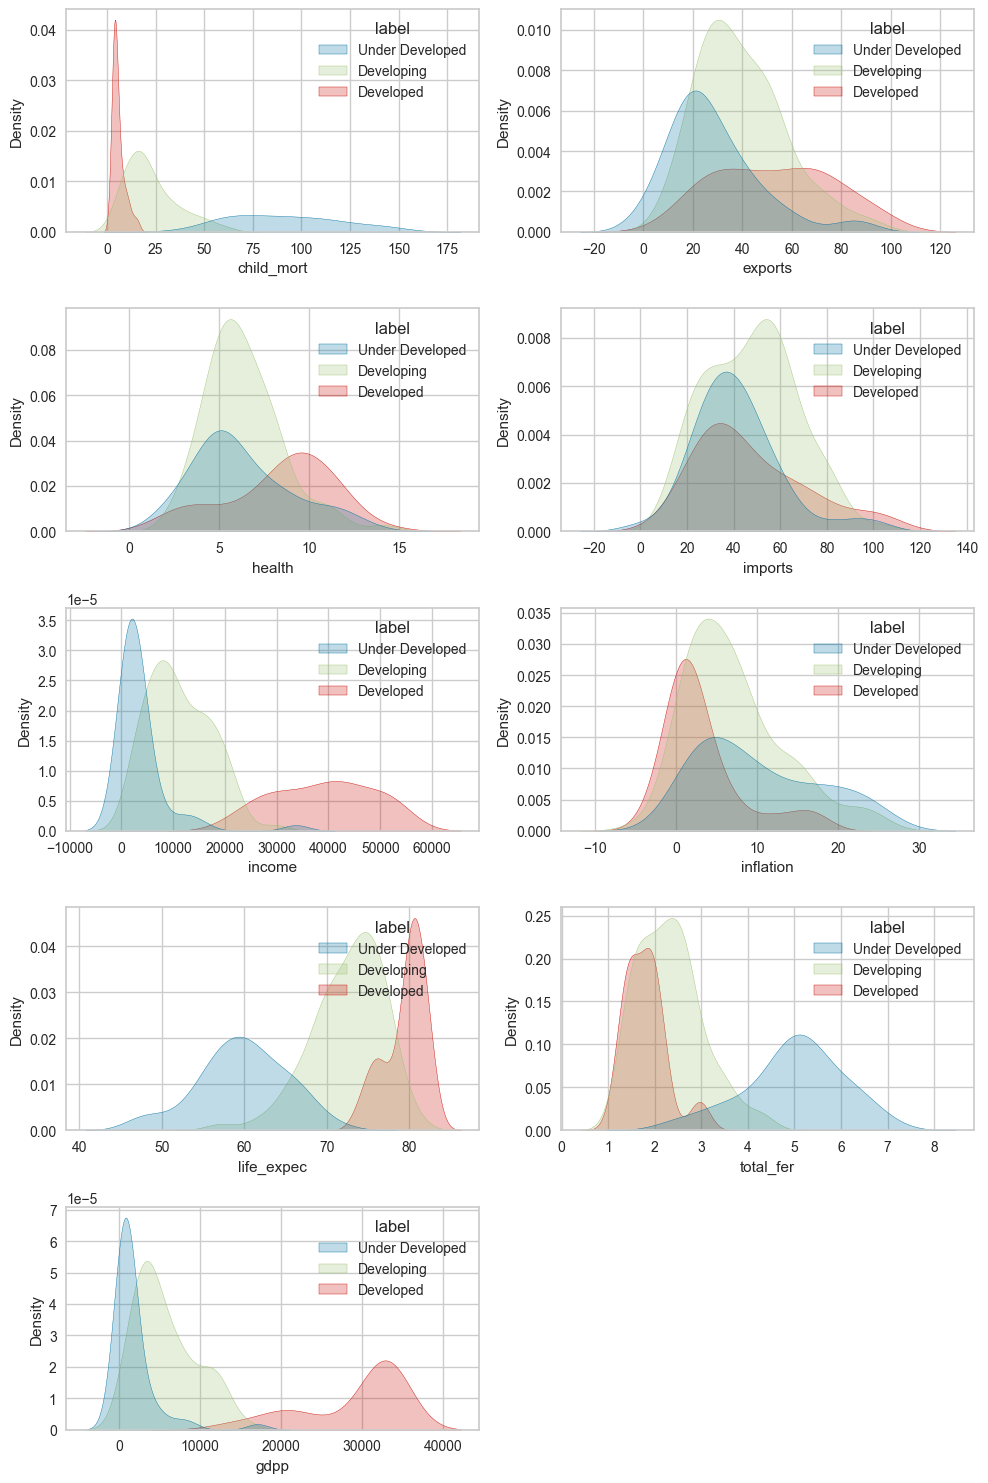

In [54]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    if i!= 'label':
        plt.subplot(5,2,t)
        sns.kdeplot(data=data,x=i,hue='label',fill=True)
        t+=1
plt.tight_layout()
plt.show()

In [55]:
# Lisst of countries in both the classes
data[data['label']=='Under Developed'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'],
      dtype='object', name='country')

In [56]:
data[data['label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar',
       'Saudi Arabia', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [57]:
data[data['label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan',
       'Thailand', 'Tonga', 'Tunisia', 'Tu

### World Map

In [109]:
import plotly.express as px

In [119]:
# Create a data of country and label
world_data = pd.DataFrame({'Label':data['label']})
world_data.reset_index(inplace=True)
world_data.head()

,country,Label
0,Afghanistan,Under Developed
1,Albania,Developing
2,Algeria,Developing
3,Angola,Under Developed
4,Antigua and Barbuda,Developing


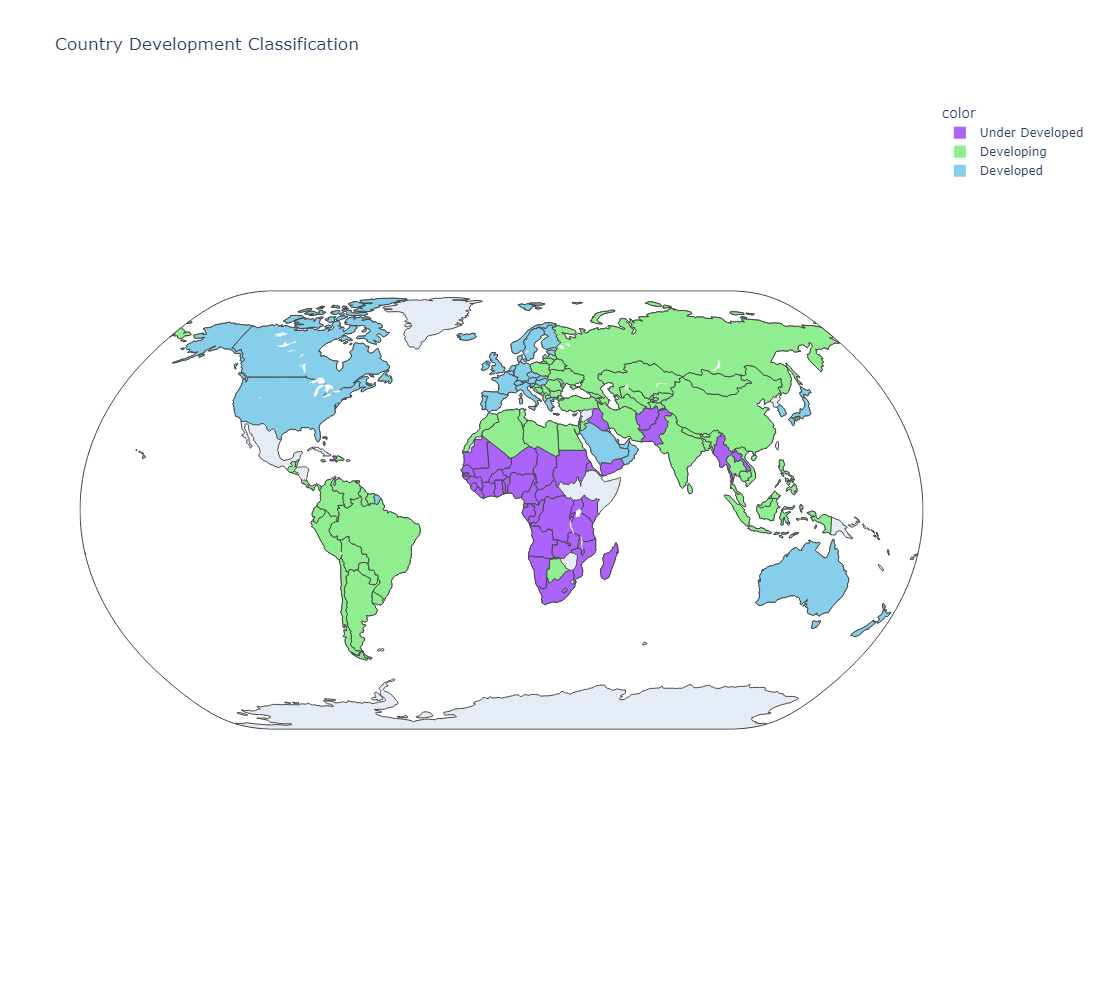

In [151]:
fig = px.choropleth(data_frame=world_data,locationmode='country names',
                   locations='country',color=data['label'],
                    color_discrete_map={'Developed': '#87CEEB',      
                                       'Developing': '#90EE90',    
                                   'Underdeveloped': '#FFB6C1' 
                                                             },
                    title="Country Development Status",width=1200,height=1000)

fig.update_geos(projection_type='natural earth')
fig.update_layout(title='Country Development Classification')
fig.show()